# Report
## The Challenge

[image1]: https://user-images.githubusercontent.com/10624937/42135619-d90f2f28-7d12-11e8-8823-82b970a54d7e.gif "Trained Agent"

![Trained Agent][image1]

The challenge is to train an agent to navigate and collect yellow bananas while avoiding blue bananas in a large, square world.

## Theory
### The Idea behind Reinforcement Learning
The following section refers to Sutton, R., and Brato, A., 2018.  
The challenge can be solved through Reinforcement Learning (RL). RL is a machine learning approach where an agent interacts with an environment.
Observing a state the agent tries to maximize an expected cumulative future reward by selecting the next action. Therefore the goal is to find an optimal policy $\pi_*$ which maps an optimal action $a$ to an observed state $s$.
In above described challenge the states are a 37 dimensions space containing the agent's velocity, along with ray-based perception of objects around the agent's forward direction, whereas the actions are given as

- **`0`** - move forward,
- **`1`** - move backward,
- **`2`** - turn left,
- **`3`** - turn right.

Furthermore the environment provides a reward $R$ of +1 when the agent is collecting a yellow banana - a reward of -1 is provided when a blue banana is collected.  

The actions are evaluated with the following eqation:

$q_\pi(s,a) = E_\pi[G_t | S_t = s, A_t = a]$

This is the action-value function, which returns the expected return of an action $a$ in state $s$ at time $t$ when the agent is following the policy $\pi$ for all future time steps. $G_t$ can be rewritten as:

$G_t = R_{t+1} + \gamma v_\pi(S_{t+1})$

Here $R_{t+1}$ is the reward which is provided by the environment at the next time step, $v_\pi(S_{t+1})$ is corresponds to the value of the next state $S_{t+1}$ under the policy $\pi$, $\gamma$ is the discount factor $\in [0,1]$.  

The optimal policy $\pi_*$ is given as:

$\pi_*(s) = argmax_{a \in A(s)} q_*(s,a)$ for all $s \in S$

Finding the optimal policy can be achieved with differend approaches. One is *Q-Learning* which shall be covered in detail below. [Sutton, R., and Brato, A] 


### Q-Learning
The following section refers to Sutton, R., and Brato, A., 2018.  
The idea here is to let an agent interact with the environment starting randomly and continously improve the policy to obtain the optimal policy after numerous interactions.

If we assume that there is only a finite number of states and actions we can write the action-value function $q_\pi$ corresonding to a policy $\pi$ in a so called *Q-table*. This table has one row for each state and one column for each action. 

To let the agent start randomly the action values in the Q-table need to be initialized arbitrarily. The agent will then select an action $A_0$ based on an observed state $S_0$ greedily, which means selecting the action with the maximum value across all possible actions. We call this a *greedy-policy*.

Consequently the agent will receive a reward $R_{t+1}$ from the environment and observe a next state $S_{t+1}$. This can then be applied to update the Q-table as follows:

$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a) - Q(S_t, A_t)\big)$

Here $\alpha$ is the step size of the update and shall be a small positive number usually $\alpha \ll 1$ but at least $\alpha \leq 1$.  
The greedy-policy brings a problem: If one action dominates the others with respect to their action values given a specific state, the algorithm will always select this action when the state is observed. This may lead to a non-optimal policy if rewards are not deterministic. Therefore an *$\epsilon$-greedy-policy* is being introduced:
With a probability of $\epsilon \in [0,1]$ actions are selected randomly - with a probability of $1-\epsilon$ actions are selected greedily. The value of $\epsilon$ is reduced continously to allow a greedier policy with maturing agent. This has the advantage that the agent can explore the interaction with the environment to a higher degree and come up with a better policy eventually.

### Deep Q-Learning
The following section refers to Mnih et al., 2015.  
In Deep Q-Learning artificial neural networks are used as a function approximator to obtain action-values based on an observed state (this called a Deep Q-Network). This has the advantage that large state spaces or even raw pixel data can be used whereas approaches with Q-tables would due to complexity.

#### Experience Replay
There is the effect that a sequence of experience tuples $(S_t, A_t, R_{t+1}, S_{t+1})$ can be highly correlated. As this can negatively effect the learning process, a buffer is used to store experiences. Updates of the Q-Network are then applied on sampled batches of this buffer. This is called experience replay.

The loss function (mean-squared-error) of the update is given as follows:

$L_t(w) = E_\pi \big[ \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) - Q(S_t, A_t, w) \big)^2\big]$

So the loss is the mean squared difference between the target consisting of the immediate observed return and the value of the next action selected by the greedy policy and the prediction which is the value of an action selected in an $\epsilon$-greedy manner, where the values are given by the current Q-Network.
The following equations gives the following update rule for the Q-Network:

$\Delta w = \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) - Q(S_t, A_t, w) \big) \nabla_w Q(S_t, A_t, w)$

#### Fixed Q-Targets
If we take a closer look to the loss function, we can see, that the difference between target and prediction are both dependend on the same Q-Network. This is like chasing a moving target and in contrast to supervised learning, where targets are fixed before learning begins.  
Because of that the weights of the target network are only updated periodically with the weights of the Q-Network. This decouples both networks' weights and reduced correlations between both. The weights of the target network are therefore denoted as $w^-$:

$\Delta w = \alpha \big(R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w^-) - Q(S_t, A_t, w) \big) \nabla_w Q(S_t, A_t, w)$

#### Soft Target-Network updates
As an alternative to periodically replacing the Target Network weights with the ones of the Q-Network, one can apply a soft update after e.g. every step [Li, 2018]. This works as follows:

$w^- \leftarrow \tau w + (1-\tau) w^-$ where $\tau \ll 1$

### Double Deep Q-Learning
The following section refers to [v. Hasselt et al., 2015].  
There is an extension of Deep Q-Learning which is called *Double Deep Q-Learning* and it tackels one inherent problem. If one rearranges the target in the loss function one can see that the same network ist used for both selecting and evaluating the action:

$ R_{t+1} + \gamma max_{a \in A(S_{t+1})} Q(S_{t+1}, a, w) 
= R_{t+1} + \gamma Q \big( S_{t+1}, argmax_{a \in A(S_{t+1})} Q(S_{t+1}, a, w), w \big)$

This makes it more likely that actions are selected which are overestimated. We can simply decouple the selection from the evaluation by making use of an other network similar to the above introduced concept Fixed Q-Targets. We can even use the Target Network. It follows:

$ R_{t+1} + \gamma Q \big( S_{t+1}, argmax_{a \in A(S_{t+1})} Q(S_{t+1}, a, w), w^- \big)$

Now the greedy-policy is used the select the next action for the target, but the Target Network is used for its evaluation.


### Hyperparameters
As usual for machine learning approaches, we need to tune a bunch of hyperparameters:

- Replay Buffer size: amount of experience tuples to be stored in the buffer
- Batch size: size of sample which is used to apply Q-Network update on
- Discount factor
- $\tau$: qunatifies soft update, if $\tau=1$, target network weights are simply replaced with Q-Network weights
- $\alpha$: Learning rate / step size for Q-Network update
- Number of steps after Q-Network is updated again:
- Number of steps after Target Network is updated again
- $\epsilon$-greedy-policy: As $\epsilon$ shall be reduced over time, we need to define three values:
    - $\epsilon_{start}$: $\epsilon$ at $t=0$
    - $\epsilon_{end}$: minimum possible $\epsilon$
    - $\epsilon_{decay}$: describes the progress: $\epsilon \leftarrow \epsilon * \epsilon_{decay}$ where $\epsilon_{decay} \in [0,1]$
- The architecture of the Q-Network (number of nodes in the hidden layers)

## The Implementation
No it's time to implement the above described concepts for the Navigation challenge. We will start with initializing both the Unity Environment and the agent. For the initiaization of the agent we need to take a closer look, because we need to define the hyperparameters.

In [4]:
import torch
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from collections import deque

from agent import Agent
from model import QNetwork

### Initialize Unity Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`


If the following code cell will be executed successfully a Unity Environment window will open.

In [2]:
# Initialize the environment
env = UnityEnvironment(file_name='Banana_Linux/Banana.x86', worker_id=1)

# Get default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Get state and action spaces
env_info = env.reset(train_mode=True)[brain_name]
state_size = len(env_info.vector_observations[0])
action_size = brain.vector_action_space_size
print('State size:', state_size)
print('Action size:', action_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


State size: 37
Action size: 4


### Initialize agent
If you take a look the in agent.py file you can see which arguments are required and which default values are given. The default values are following [Mnih et al., 2015].  
Besides the state and the action sizes which are given by the environment we need to specify the number of nodes in the hidden layers. Let's initialize an agent with 256, 128 and 64 nodes in the hidden layers.

In [5]:
agent1 = Agent(state_size, action_size, hidden_layers=[256, 128, 64])
agent1.get_info()

AttributeError: 'Agent' object has no attribute 'get_info'

### Deep Q-Learning
Besides above printed hyperparamters three additional parameters are specified here, namely:

- $\epsilon$ start: 1
- $\epsilon$  end: 0.1
- $\epsilon$  decay: 0.995

They handle the $\epsilon$-greedy policy.  
The following cells will apply Deep Q-Learning with experience replay and fixed Q targets.

In [5]:
def dqn(env, brain_name, 
        agent, n_episodes=2000,
        epsilon_start=1.0, epsilon_end=.1, 
        epsilon_decay=.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        epsilon_start (float): starting value of epsilon, for epsilon-greedy action selection
        epsilon_end (float): minimum value of epsilon
        epsilon_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """

    scores = []
    scores_window = deque(maxlen=100)
    epsilon = epsilon_start
    for e in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        while True:
            action = agent.act(state, epsilon)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break

        # Relative score
        scores_window.append(score)
        scores.append(score)

        # Update epsilon
        epsilon = max(epsilon_end, epsilon_decay*epsilon)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)), end="")
        if e % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            checkpoint = {'state_size': state_size,
                          'action_size': action_size,
                          'hidden_layers': [each.out_features for each in agent.qnet_local.hidden_layers],
                          'state_dict': agent.qnet_local.state_dict()}
            torch.save(checkpoint, 'checkpoint.pth')
            break
    return scores

In [6]:
def plot_scores(scores_dict):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for key, scores in scores_dict.items():
        scores_smoothed = gaussian_filter1d(scores, sigma=5)
        plt.plot(np.arange(len(scores)), scores_smoothed, label=key)
    plt.ylabel('smoothed Score')
    plt.xlabel('Episode #')
    plt.legend()
    plt.show()

Episode 100	Average Score: 0.73
Episode 200	Average Score: 4.31
Episode 300	Average Score: 7.29
Episode 400	Average Score: 10.72
Episode 490	Average Score: 13.02
Environment solved in 390 episodes!	Average Score: 13.02


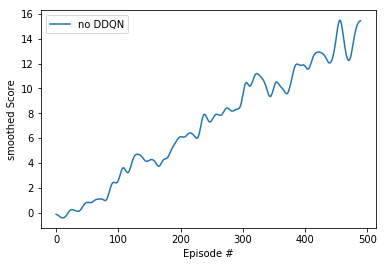

In [7]:
scores_no_ddqn = dqn(env, brain_name, agent1, n_episodes=2000)
plot_scores({'no DDQN': scores_no_ddqn})

### Double DQN
In the following cells RL is being applied with Double DQN to check if agent's policy can be improved (v. Hasselt et al., 2015)

In [8]:
agent2 = Agent(state_size, action_size, hidden_layers=[256, 128, 64], ddqn=True)

Episode 100	Average Score: 0.59
Episode 200	Average Score: 2.86
Episode 300	Average Score: 6.95
Episode 400	Average Score: 10.28
Episode 498	Average Score: 13.01
Environment solved in 398 episodes!	Average Score: 13.01


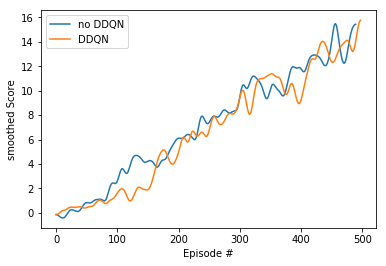

In [9]:
scores_ddqn = dqn(env, brain_name, agent2, n_episodes=2000)
plot_scores({'no DDQN': scores_no_ddqn,
             'DDQN': scores_ddqn})

As shown in the plot, the Double Deep Q-Learning algorithm took slightly longer to reach an average score > 13 than the plain vanilla Deep Q Learning algorithm.  
Because the difference is so small, no clear answer can be given which algorithm is the best choice. I'd recommend to test performances with different seeds and let the agent learn for longer period, to find out which algorithm will come up with a higher score.

### Watch how the RL agent is acting in the environment

In [10]:
def load_checkpoints(filepath):
    checkpoint = torch.load(filepath)
    model = QNetwork(checkpoint['state_size'],
                     checkpoint['action_size'],
                     checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    return model

def apply(env, brain_name, filepath):
    model = load_checkpoints(filepath)
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    while True:
        state = torch.from_numpy(state).float().unsqueeze(0).to('cpu')
        model.eval()
        with torch.no_grad():
            action_values = model(state)
        action = np.argmax(action_values.cpu().data.numpy())
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        score += reward
        state = next_state
        if done:
            break
    print('Score: {}'.format(score))
    
apply(env, brain_name, 'checkpoint.pth')

Score: 19.0


In [11]:
# Close environment
env.close()

Amazing, right? Could you see how the agent is collecting yellow bananas while it is avoiding blue ones?

## Next steps
I'm sure that the algorithm can be further improved. Potential extensions of the algorithm are:  

- Prioritized Experience Replay
- Duelling DQN
- Multi-step Bootstrap Targets (A3C)
- Distributional DQN
- Noisy DQN

## References
- Mnih,  V.,  Kavukcuoglu,  K.,  Silver,  D.,  Rusu,  A. A.,  Veness, J., Bellemare, M. G., Graves, A., Riedmiller, M., Fidjeland, A. K., Ostrovski, G., Petersen, S., Beattie, C., Sadik, A., Antonoglou, I., King, H., Kumaran, D., Wierstra, D., Legg, S., and Hassabis, D.  Human-level control through deep reinforcement learning. Nature,  518 (7540):529–533, 2015.
- van Hasselt, H., Guez, A., and Silver, D.  Deep reinforcement  learning  with  double  Q-learning. arXiv  preprint arXiv:1509.06461, 2015.
- Sutton, R., and Brato, A., Reinforcement Learning. An Introduction (MIT Press, 2018)
- Li, Y., Deep Reinforcement Learning: An Overview, arXiv:1701.07274v6, 2018